In [31]:
import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from DatasetHandler  import *

In [101]:
def build_model(n_features, n_classes, num_layers=3):
    model = Sequential()
    
    delta = np.power(n_features / n_classes, 1/num_layers)
    n_2 = np.int(4*n_features / delta)
    n_3 = np.int(3*n_2 / delta)
    model.add(Dense(n_2, input_dim=n_features, activation='relu'))
    model.add(Dense(n_3, activation='relu'))
    model.add(Dense(n_classes, activation='sigmoid'))
    return model

In [102]:
df = pd.read_csv('Dataset.csv', index_col=False)

In [103]:
y = df['Label']

In [104]:
x = df.drop(columns=['Unnamed: 0', 'Label'])

In [105]:
msk = ~x.isin([np.nan, np.inf, -np.inf]).any(1)
x = x[msk]
y = y[msk]

In [106]:
sc = MinMaxScaler()
x = sc.fit_transform(x)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [108]:
n_features = x.shape[1]
dense_net = build_model(n_features, 1)
dense_net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','AUC'])

In [109]:
history = dense_net.fit(x_train, y_train.values,validation_data = (x_test,y_test), epochs=400, batch_size=10000)

Epoch 1/400
18/18 [==============================] - 1s 28ms/step - loss: 0.6987 - accuracy: 0.5025 - auc: 0.4565 - val_loss: 0.6830 - val_accuracy: 0.4999 - val_auc: 0.6832
Epoch 2/400
18/18 [==============================] - 0s 19ms/step - loss: 0.6721 - accuracy: 0.5948 - auc: 0.7485 - val_loss: 0.6608 - val_accuracy: 0.7049 - val_auc: 0.8050
Epoch 3/400
18/18 [==============================] - 0s 19ms/step - loss: 0.6505 - accuracy: 0.7401 - auc: 0.8238 - val_loss: 0.6384 - val_accuracy: 0.7464 - val_auc: 0.8501
Epoch 4/400
18/18 [==============================] - 0s 20ms/step - loss: 0.6266 - accuracy: 0.7565 - auc: 0.8595 - val_loss: 0.6122 - val_accuracy: 0.7726 - val_auc: 0.8734
Epoch 5/400
18/18 [==============================] - 0s 19ms/step - loss: 0.5971 - accuracy: 0.7804 - auc: 0.8711 - val_loss: 0.5784 - val_accuracy: 0.7956 - val_auc: 0.8823
Epoch 6/400
18/18 [==============================] - 0s 20ms/step - loss: 0.5611 - accuracy: 0.8135 - auc: 0.8798 - val_loss: 0.53

Epoch 48/400
18/18 [==============================] - 0s 21ms/step - loss: 0.2127 - accuracy: 0.9053 - auc: 0.9800 - val_loss: 0.2110 - val_accuracy: 0.9075 - val_auc: 0.9801
Epoch 49/400
18/18 [==============================] - 0s 20ms/step - loss: 0.2109 - accuracy: 0.9063 - auc: 0.9805 - val_loss: 0.2096 - val_accuracy: 0.9015 - val_auc: 0.9804
Epoch 50/400
18/18 [==============================] - 0s 18ms/step - loss: 0.2092 - accuracy: 0.9064 - auc: 0.9806 - val_loss: 0.2074 - val_accuracy: 0.9061 - val_auc: 0.9807
Epoch 51/400
18/18 [==============================] - 0s 21ms/step - loss: 0.2075 - accuracy: 0.9070 - auc: 0.9809 - val_loss: 0.2058 - val_accuracy: 0.9087 - val_auc: 0.9809
Epoch 52/400
18/18 [==============================] - 0s 26ms/step - loss: 0.2059 - accuracy: 0.9069 - auc: 0.9811 - val_loss: 0.2046 - val_accuracy: 0.9101 - val_auc: 0.9811
Epoch 53/400
18/18 [==============================] - 0s 23ms/step - loss: 0.2043 - accuracy: 0.9076 - auc: 0.9812 - val_loss

Epoch 95/400
18/18 [==============================] - 0s 17ms/step - loss: 0.1324 - accuracy: 0.9516 - auc: 0.9908 - val_loss: 0.1275 - val_accuracy: 0.9518 - val_auc: 0.9909
Epoch 96/400
18/18 [==============================] - 0s 17ms/step - loss: 0.1313 - accuracy: 0.9519 - auc: 0.9909 - val_loss: 0.1265 - val_accuracy: 0.9506 - val_auc: 0.9910
Epoch 97/400
18/18 [==============================] - 0s 17ms/step - loss: 0.1301 - accuracy: 0.9524 - auc: 0.9911 - val_loss: 0.1247 - val_accuracy: 0.9523 - val_auc: 0.9910
Epoch 98/400
18/18 [==============================] - 0s 18ms/step - loss: 0.1288 - accuracy: 0.9529 - auc: 0.9912 - val_loss: 0.1235 - val_accuracy: 0.9527 - val_auc: 0.9914
Epoch 99/400
18/18 [==============================] - 0s 17ms/step - loss: 0.1277 - accuracy: 0.9532 - auc: 0.9914 - val_loss: 0.1224 - val_accuracy: 0.9535 - val_auc: 0.9917
Epoch 100/400
18/18 [==============================] - 0s 18ms/step - loss: 0.1266 - accuracy: 0.9540 - auc: 0.9915 - val_los

18/18 [==============================] - 0s 22ms/step - loss: 0.1004 - accuracy: 0.9647 - auc: 0.9941 - val_loss: 0.0945 - val_accuracy: 0.9644 - val_auc: 0.9943
Epoch 142/400
18/18 [==============================] - 0s 22ms/step - loss: 0.1000 - accuracy: 0.9648 - auc: 0.9942 - val_loss: 0.0943 - val_accuracy: 0.9652 - val_auc: 0.9943
Epoch 143/400
18/18 [==============================] - 0s 21ms/step - loss: 0.0996 - accuracy: 0.9655 - auc: 0.9942 - val_loss: 0.0938 - val_accuracy: 0.9650 - val_auc: 0.9944
Epoch 144/400
18/18 [==============================] - 0s 21ms/step - loss: 0.0995 - accuracy: 0.9657 - auc: 0.9942 - val_loss: 0.0934 - val_accuracy: 0.9655 - val_auc: 0.9944
Epoch 145/400
18/18 [==============================] - 0s 27ms/step - loss: 0.0989 - accuracy: 0.9660 - auc: 0.9943 - val_loss: 0.0932 - val_accuracy: 0.9662 - val_auc: 0.9944
Epoch 146/400
18/18 [==============================] - 0s 27ms/step - loss: 0.0986 - accuracy: 0.9667 - auc: 0.9943 - val_loss: 0.0928

Epoch 188/400
18/18 [==============================] - 0s 18ms/step - loss: 0.0840 - accuracy: 0.9739 - auc: 0.9955 - val_loss: 0.0794 - val_accuracy: 0.9732 - val_auc: 0.9957
Epoch 189/400
18/18 [==============================] - 1s 29ms/step - loss: 0.0838 - accuracy: 0.9742 - auc: 0.9955 - val_loss: 0.0791 - val_accuracy: 0.9735 - val_auc: 0.9957
Epoch 190/400
18/18 [==============================] - 0s 21ms/step - loss: 0.0836 - accuracy: 0.9741 - auc: 0.9955 - val_loss: 0.0791 - val_accuracy: 0.9737 - val_auc: 0.9957
Epoch 191/400
18/18 [==============================] - 0s 21ms/step - loss: 0.0833 - accuracy: 0.9744 - auc: 0.9955 - val_loss: 0.0787 - val_accuracy: 0.9738 - val_auc: 0.9957
Epoch 192/400
18/18 [==============================] - 0s 23ms/step - loss: 0.0830 - accuracy: 0.9741 - auc: 0.9955 - val_loss: 0.0785 - val_accuracy: 0.9736 - val_auc: 0.9958
Epoch 193/400
18/18 [==============================] - 0s 22ms/step - loss: 0.0827 - accuracy: 0.9746 - auc: 0.9956 - va

18/18 [==============================] - 0s 17ms/step - loss: 0.0726 - accuracy: 0.9769 - auc: 0.9962 - val_loss: 0.0693 - val_accuracy: 0.9773 - val_auc: 0.9963
Epoch 235/400
18/18 [==============================] - 0s 18ms/step - loss: 0.0724 - accuracy: 0.9770 - auc: 0.9962 - val_loss: 0.0706 - val_accuracy: 0.9772 - val_auc: 0.9963
Epoch 236/400
18/18 [==============================] - 0s 23ms/step - loss: 0.0725 - accuracy: 0.9771 - auc: 0.9961 - val_loss: 0.0692 - val_accuracy: 0.9766 - val_auc: 0.9964
Epoch 237/400
18/18 [==============================] - 0s 24ms/step - loss: 0.0719 - accuracy: 0.9769 - auc: 0.9962 - val_loss: 0.0689 - val_accuracy: 0.9770 - val_auc: 0.9963
Epoch 238/400
18/18 [==============================] - 0s 17ms/step - loss: 0.0717 - accuracy: 0.9770 - auc: 0.9962 - val_loss: 0.0687 - val_accuracy: 0.9768 - val_auc: 0.9963
Epoch 239/400
18/18 [==============================] - 0s 17ms/step - loss: 0.0714 - accuracy: 0.9770 - auc: 0.9962 - val_loss: 0.0685

Epoch 281/400
18/18 [==============================] - 0s 18ms/step - loss: 0.0619 - accuracy: 0.9794 - auc: 0.9968 - val_loss: 0.0620 - val_accuracy: 0.9800 - val_auc: 0.9968
Epoch 282/400
18/18 [==============================] - 0s 19ms/step - loss: 0.0618 - accuracy: 0.9794 - auc: 0.9968 - val_loss: 0.0616 - val_accuracy: 0.9795 - val_auc: 0.9968
Epoch 283/400
18/18 [==============================] - 0s 18ms/step - loss: 0.0617 - accuracy: 0.9794 - auc: 0.9968 - val_loss: 0.0611 - val_accuracy: 0.9798 - val_auc: 0.9968
Epoch 284/400
18/18 [==============================] - 0s 18ms/step - loss: 0.0614 - accuracy: 0.9794 - auc: 0.9968 - val_loss: 0.0611 - val_accuracy: 0.9796 - val_auc: 0.9969
Epoch 285/400
18/18 [==============================] - 0s 17ms/step - loss: 0.0614 - accuracy: 0.9796 - auc: 0.9968 - val_loss: 0.0611 - val_accuracy: 0.9800 - val_auc: 0.9969
Epoch 286/400
18/18 [==============================] - 0s 18ms/step - loss: 0.0609 - accuracy: 0.9797 - auc: 0.9969 - va

18/18 [==============================] - 0s 22ms/step - loss: 0.0552 - accuracy: 0.9813 - auc: 0.9973 - val_loss: 0.0567 - val_accuracy: 0.9817 - val_auc: 0.9972
Epoch 328/400
18/18 [==============================] - 0s 22ms/step - loss: 0.0551 - accuracy: 0.9815 - auc: 0.9974 - val_loss: 0.0557 - val_accuracy: 0.9817 - val_auc: 0.9973
Epoch 329/400
18/18 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 0.9814 - auc: 0.9974 - val_loss: 0.0556 - val_accuracy: 0.9816 - val_auc: 0.9973
Epoch 330/400
18/18 [==============================] - 0s 20ms/step - loss: 0.0549 - accuracy: 0.9814 - auc: 0.9974 - val_loss: 0.0557 - val_accuracy: 0.9817 - val_auc: 0.9973
Epoch 331/400
18/18 [==============================] - 0s 22ms/step - loss: 0.0546 - accuracy: 0.9815 - auc: 0.9974 - val_loss: 0.0553 - val_accuracy: 0.9816 - val_auc: 0.9974
Epoch 332/400
18/18 [==============================] - 0s 28ms/step - loss: 0.0545 - accuracy: 0.9814 - auc: 0.9974 - val_loss: 0.0553

Epoch 374/400
18/18 [==============================] - 0s 19ms/step - loss: 0.0498 - accuracy: 0.9831 - auc: 0.9978 - val_loss: 0.0515 - val_accuracy: 0.9830 - val_auc: 0.9977
Epoch 375/400
18/18 [==============================] - 0s 20ms/step - loss: 0.0497 - accuracy: 0.9833 - auc: 0.9977 - val_loss: 0.0508 - val_accuracy: 0.9832 - val_auc: 0.9977
Epoch 376/400
18/18 [==============================] - 0s 24ms/step - loss: 0.0499 - accuracy: 0.9831 - auc: 0.9977 - val_loss: 0.0509 - val_accuracy: 0.9832 - val_auc: 0.9977
Epoch 377/400
18/18 [==============================] - 0s 21ms/step - loss: 0.0493 - accuracy: 0.9833 - auc: 0.9978 - val_loss: 0.0509 - val_accuracy: 0.9832 - val_auc: 0.9977
Epoch 378/400
18/18 [==============================] - 0s 24ms/step - loss: 0.0492 - accuracy: 0.9834 - auc: 0.9978 - val_loss: 0.0505 - val_accuracy: 0.9832 - val_auc: 0.9977
Epoch 379/400
18/18 [==============================] - 0s 23ms/step - loss: 0.0490 - accuracy: 0.9834 - auc: 0.9978 - va

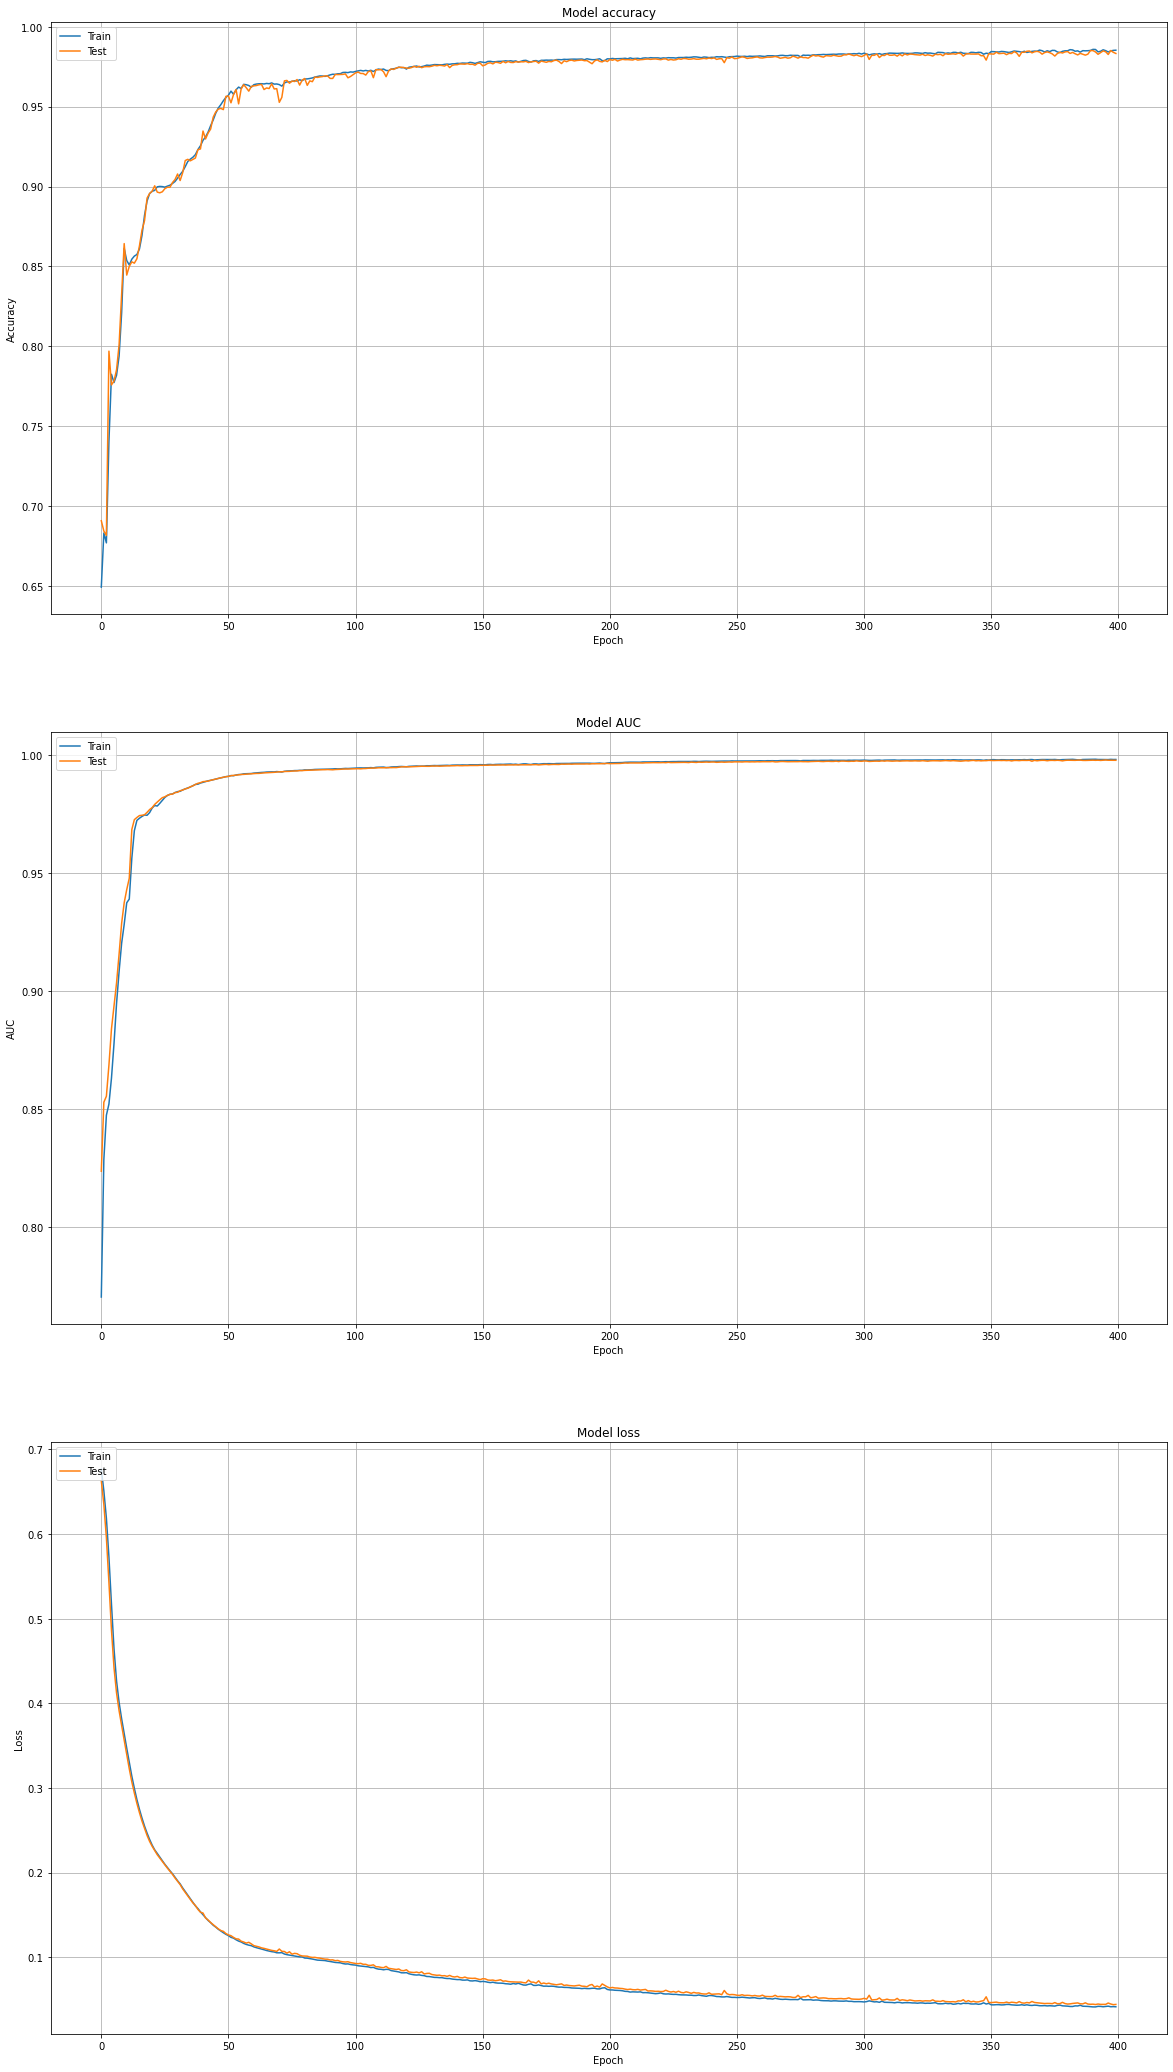

In [52]:
show_nn_metrics(history)